<a href="https://colab.research.google.com/github/oymin2001/DataScience/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

%matplotlib inline

#1. Binary Class

In [2]:
binary_confusion_matrix = pd.DataFrame({'Positive':['TP','FP'],'Negative':['FN','TN']})
binary_confusion_matrix.columns.name = 'Predict'
binary_confusion_matrix.index = ['True', 'False']
binary_confusion_matrix.index.name = 'Actual'
binary_confusion_matrix

Predict,Positive,Negative
Actual,,
True,TP,FN
False,FP,TN


- accuracy score = P(predict == actual) = (TP + TN) / (TP + FN + FP + TN): 전체에서 실제와 예측값이 일치한 비율


- precison score = P(predict == actual | positive) = TP / (TP + FP): 양성이라고 예측했을때 실제로 양성인 비율


- recall score = P(predict == actual | true) = TP / (TP + FN): 실제로 양성일때 양성이라고 예측한 비율


- F1-Score: Precision score와 Recall score의 조화평균

**데이터가 균등할 때는 accuracy score를 불균등할 때는 F1-score를 사용하는 것이 좋다.**

In [3]:
def get_binary_confusion_matrix(label, predict):
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(label)):
        if(label[i] == 1): # actually true
            if(predict[i] == 1): #True Positive
                TP+=1 
            else: # False negative
                FN+=1

        else: #actually false
            if(predict[i] == 1): #False Positive
                FP += 1
            else: # True Negative
                TN += 1
    
    table = pd.DataFrame({'Positive':[TP,FP],'Negative':[FN,TN]})
    table.columns.name = 'Predict'
    table.index = ['True', 'False']
    table.index.name = 'Actual'
    return table

In [4]:
def get_score(table):
    TP = table['Positive']['True']
    FP = table['Positive']['False']
    FN = table['Negative']['True']
    TN = table['Negative']['False']
    acc = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return acc, precision, recall

In [83]:
class binary_confusion_matrix:
    def __init__(self):
        self.TP = 0
        self.FP = 0
        self.FN = 0
        self.TN = 0

    def fit(self, label, predict):
        for i in range(len(label)):
            if(label[i] == 1): # actually true
                if(predict[i] == 1): #True Positive
                    self.TP+=1 
                else: # False negative
                    self.FN+=1

            else: #actually false
                if(predict[i] == 1): #False Positive
                    self.FP += 1
                else: # True Negative
                    self.TN += 1

    def visualization(self):
        table = pd.DataFrame({'Positive':[self.TP, self.FP],'Negative':[self.FN, self.TN]})
        table.columns.name = 'Predict'
        table.index = ['True', 'False']
        table.index.name = 'Actual'
        plt.figure(figsize=(8,6))
        sns.heatmap(table.values, annot=True)
        plt.title("Confusion Matrix")

    def get_score(self):
        acc = (self.TP + self.TN) / (self.TP + self.FP + self.FN + self.TN)
        precision = self.TP / (self.TP + self.FP)
        recall = self.TP / (self.TP + self.FN)
        f1 = 2*(precision*recall) / (precision + recall) 
        print('\n=====================================Confusion Matrix Score==================================\n')
        print("Accuracy score is {}. Precision score is {}. Recall score is {}. F1-score is {}.".format(np.round(acc,2), np.round(precision,2), np.round(recall,2), np.round(f1,2)))
        print('\n=============================================================================================\n') 

In [73]:
data = load_breast_cancer()
features = data.data
label = data.target
df_clf = DecisionTreeClassifier(random_state=42)

In [74]:
X_train ,X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
df_clf.fit(X_train, y_train)
y_pred = df_clf.predict(X_test)

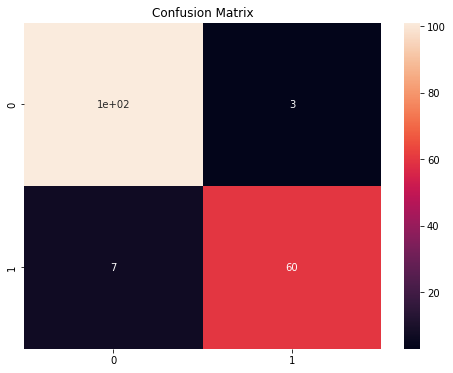

In [75]:
conf_matrix = binary_confusion_matrix()
conf_matrix.fit(y_pred, y_test)
conf_matrix.visualization()

In [76]:
conf_matrix.get_score()


=====================================Confusion Matrix Score==================================

Accuracy score is 0.94. Precision score is 0.94. Recall score is 0.97. F1-score is 0.95.




##1.1 ROC Curve
    X-axis: FPR(False Postivie Rate) = FP / (FP + TN)
    
    Y-axis: TPR(True Positive Rate) = TP / (TP + FN)
    
    parameter: threshold
        

ROC_AUC_Score:  0.944


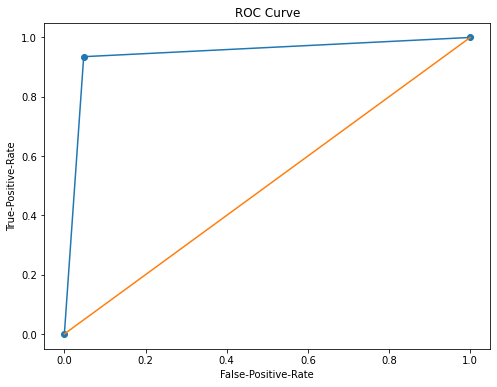

In [95]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
print('ROC_AUC_Score: ',np.round(roc_auc_score(y_test, y_pred), 3))

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.scatter(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False-Positive-Rate')
plt.ylabel('True-Positive-Rate')
plt.title('ROC Curve')
plt.show()    

In [96]:
threshold

array([2, 1, 0])

#2. Multi Class

In [12]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
feature = data.data
label = data.target
skfold = StratifiedKFold(n_splits = 3)
clf = DecisionTreeClassifier()

cv_accuracy=[]
cv_micro_precision=[]
cv_macro_precision=[]
cv_weighted_precision=[]
cv_micro_recall=[]
cv_macro_recall=[]
cv_weighted_recall=[]

In [14]:
n_iter = 0

for train_idx, test_idx in skfold.split(feature, label):
    X_train, X_test = feature[train_idx], feature[test_idx]
    y_train, y_test = label[train_idx], label[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, y_pred), 3)
    
    precision_micro = np.round(precision_score(y_test, y_pred, average = 'micro'), 3)
    precision_macro = np.round(precision_score(y_test, y_pred, average = 'macro'), 3)
    precision_weighted = np.round(precision_score(y_test, y_pred, average = 'weighted'), 3)
    
    recall_micro = np.round(recall_score(y_test, y_pred, average = 'micro'), 3)
    recall_macro = np.round(recall_score(y_test, y_pred, average = 'macro'), 3)
    recall_weighted = np.round(recall_score(y_test, y_pred, average = 'weighted'), 3)

    cv_accuracy.append(accuracy)
    cv_micro_precision.append(precision_micro)
    cv_macro_precision.append(precision_macro)
    cv_weighted_precision.append(precision_weighted)
    
    cv_micro_recall.append(recall_micro)
    cv_macro_recall.append(recall_macro)
    cv_weighted_recall.append(recall_weighted)

In [15]:
print('micro precision:', cv_micro_precision)
print('macro precision:', cv_macro_precision)
print('weighted precision:', cv_weighted_precision)

micro precision: [0.98, 0.94, 1.0]
macro precision: [0.981, 0.941, 1.0]
weighted precision: [0.981, 0.941, 1.0]


In [16]:
print('micro recall:', cv_micro_recall)
print('macro recall:', cv_macro_recall)
print('weighted recall:', cv_weighted_recall)

micro recall: [0.98, 0.94, 1.0]
macro recall: [0.979, 0.939, 1.0]
weighted recall: [0.98, 0.94, 1.0]


- micro average의 경우 모든 라벨에서의 TP, TN, FP, FN을 다 더한 total TP, TN, FP, FN을 이용하여 recall, precision을 계산한다.


- macro average의 경우 라벨마다의 TP, TN, FP, FN을 이용해 라벨 개수 만큼의 recall, precision 계산하여 평균을 구한다.

- weighted average의 경우 macro와 같이 각 라벨마다의 recall, precision을 계산하여 각 라벨마다의 데이터 수의 비율만큼을 가중치로 곱하여 평균을 계산한다. 예를 들어 0,1,2의 라벨이 있고 각각 20%, 30%, 50% 비율로 분포되어 있다면 각 라벨마다의 recall, precision score를 계산한 후 각각 0.2, 0.3, 0.5를 곱하여 더한다.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.4, random_state=42)
sclf = DecisionTreeClassifier(random_state=42)
sclf.fit(X_train, y_train)
y_pred = sclf.predict(X_test)

In [41]:
aa = 0
ab = 0
ac = 0
ba = 0
bb = 0
bc = 0
ca = 0
cb = 0
cc = 0
for i in range(len(y_test)):
    if(y_test[i] == 0):
        if(y_pred[i] == 0):
            aa += 1
        if(y_pred[i] == 1):
            ab += 1
        if(y_pred[i] == 2):
            ac += 1
    
    if(y_test[i] == 1):
        if(y_pred[i] == 0):
            ba += 1
        if(y_pred[i] == 1):
            bb += 1
        if(y_pred[i] == 2):
            bc += 1

    if(y_test[i] == 2):
        if(y_pred[i] == 0):
            ca += 1
        if(y_pred[i] == 1):
            cb += 1
        if(y_pred[i] == 2):
            cc += 1

In [42]:
TP0 = aa
TP1 = bb
TP2 = cc

FP0 = ba + ca
FP1 = ab + cb
FP2 = ac + bc

FN0 = ab + ac
FN1 = ba + bc
FN2 = ca + cb

TN0 = bb + bc + cb + cc
TN1 = aa + ac + ca + cc
TN2 = aa + ab + ba + bb

In [43]:
accuracy_score(y_pred, y_test)

0.9666666666666667

In [44]:
S = aa + ab + ac + ba + bb + bc + ca + cb +cc
TP_total = TP0 + TP1 + TP2
print('accuracy_score: ',TP_total / S)

accuracy_score:  0.9666666666666667


In [45]:
print("micro_precision: ",precision_score(y_pred, y_test, average = 'micro'))
print("micro_recall: ",recall_score(y_pred, y_test, average = 'micro'))

micro_precision:  0.9666666666666667
micro_recall:  0.9666666666666667


In [46]:
TN_total = TN0 + TN1 + TN2
FP_total = FP0 + FN1 + FN2
FN_total = FN0 + FN1 + FN2
micro_precision = TP_total / (TP_total + FP_total)
micro_recall = TP_total / (TP_total + FN_total)
print("micro_precision: ",micro_precision)
print("micro_recall: ",micro_recall)

micro_precision:  0.9666666666666667
micro_recall:  0.9666666666666667


In [47]:
print("macro_precision: ",precision_score(y_pred, y_test, average = 'macro'))
print("macro_recall: ",recall_score(y_pred, y_test, average = 'macro'))

macro_precision:  0.9639376218323585
macro_recall:  0.9639376218323585


In [48]:
precision0 = TP0 / (TP0 + FP0)
precision1 = TP1 / (TP1 + FP1)
precision2 = TP2 / (TP2 + FP2)
recall0 = TP0 / (TP0 + FN0)
recall1 = TP1 / (TP1 + FN1)
recall2 = TP2 / (TP2 + FN2)

macro_precision = np.mean([precision0, precision1, precision2])
macro_recall = np.mean([recall0, recall1, recall2])
print("macro_precision: ",macro_precision)
print("macro_recall: ",macro_recall)

macro_precision:  0.9639376218323585
macro_recall:  0.9639376218323585


In [51]:
print("weighted_precision: ",precision_score(y_pred, y_test, average = 'weighted'))
print("weighted_recall: ",recall_score(y_pred, y_test, average = 'weighted'))

weighted_precision:  0.9666666666666667
weighted_recall:  0.9666666666666667


In [50]:
p0 = (aa + ab + ac)/S
p1 = (ba + bb + bc)/S
p2 = (ca + cb + cc)/S

weighted_precision = p0*precision0 + p1*precision1 + p2*precision2
weighted_recall = p0*recall0 + p1*recall1 + p2*recall2
print("weighted_precision: ",weighted_precision)
print("weighted_recall: ",weighted_recall)

weighted_precision:  0.9666666666666667
weighted_recall:  0.9666666666666667
